In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
#shuffle(merged3)

In [2]:
rawtxt = pd.read_csv('miRNA_targets_hsa.txt',sep='\t',engine='c',error_bad_lines=False)

In [3]:
rawtxt

,mature miRNA,Ensembl transcript ID,target start,tsrget end,miRNA 3-5,alinment,target 5-3,tool name,criterion 1,criterion 2,criterion 3
0,hsa-let-7a,ENST00000344008,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,1
1,hsa-let-7a,ENST00000377015,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,0
2,hsa-let-7a,ENST00000374673,3606,3613,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
3,hsa-let-7a,ENST00000374673,5007,5014,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,0
4,hsa-let-7a,ENST00000311538,3713,3720,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
5,hsa-let-7a,ENST00000311538,5114,5121,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,1
6,hsa-let-7a,ENST00000374498,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
7,hsa-let-7a,ENST00000313298,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
8,hsa-let-7a,ENST00000374497,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,1
9,hsa-let-7a,ENST00000311772,264,271,UU---------------------GAUAUGUU-GGAUGAUGGAGU,||| :| || ||||||||,CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCC-ACUACCUCC,TargetScan,3,1,1


In [4]:
|| ||:| :|: ||||||||

SyntaxError: invalid syntax (<ipython-input-4-f9f8f7f0905e>, line 1)

In [5]:
tarscan = rawtxt[rawtxt["tool name"]=="TargetScan"]

In [6]:
tarscan["mature miRNA"].describe()

count          244389
unique            470
top       hsa-miR-608
freq             1837
Name: mature miRNA, dtype: object

In [7]:
tarscan["miRNA 3-5"][:].replace('-','')

0               -------------------UUGAUAUGUUGGAU--GAUGGAGU
1               -------------------UUGAUAUGUUGGAU--GAUGGAGU
2               ---------UUGAUAUGU---UGGAU---------GAUGGAGU
3              U--------------------UGAUAU--GUUGGAUGAUGGAGU
4               ---------UUGAUAUGU---UGGAU---------GAUGGAGU
5              U--------------------UGAUAU--GUUGGAUGAUGGAGU
6               U----------UGAUA-UG--------UUGGAU--GAUGGAGU
7               U----------UGAUA-UG--------UUGGAU--GAUGGAGU
8               U----------UGAUA-UG--------UUGGAU--GAUGGAGU
9              UU---------------------GAUAUGUU-GGAUGAUGGAGU
10             UU---------------------GAUAUGUU-GGAUGAUGGAGU
11              -------------UUGAUAUGU-------UGGAU-GAUGGAGU
12              -------------UUGAUAUGU-------UGGAU-GAUGGAGU
13              -------------UUGAUAUGU-------UGGAU-GAUGGAGU
14              -------------UUGAUAUGU-------UGGAU-GAUGGAGU
15              -------------UUGAUAUGU-------UGGAU-GAUGGAGU
16              -------------UUGAUAUGU--

In [8]:
tarscan["miRNA"] = tarscan["miRNA 3-5"].apply(lambda x: x.replace('-',''))

/home/kira/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
tarscan["target"] = tarscan["target 5-3"].apply(lambda x: x.replace('-',''))

/home/kira/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
tarscan["target"]

0         GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC
1         GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC
2         UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG
3          CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUUCUACCUCU
4         UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG
5          CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUUCUACCUCU
6         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
7         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
8         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
9          CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCCACUACCUCC
10         CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCCACUACCUCC
11        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
12        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
13        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
14        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
15        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
16        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
17         CGGGAGGCGGUCAGUGGCCUGGCAAAGAGCCGGGACUACCUCC
18        

In [11]:
shuffle(tarscan)[["miRNA","target"]].reset_index(drop=True).drop_duplicates().to_csv('targetscan.csv', index = False)

In [12]:
targetscan = pd.read_csv('targetscan.csv')

In [13]:
mirlen = []
genelen = []

for l in open('targetscan.csv', 'r'):
    #if count<3:
        (a, b) = l.strip().split(",")
        mirlen.append(len(a))
        genelen.append(len(b))

In [14]:
mirlen = mirlen[1:]
genelen = genelen[1:]

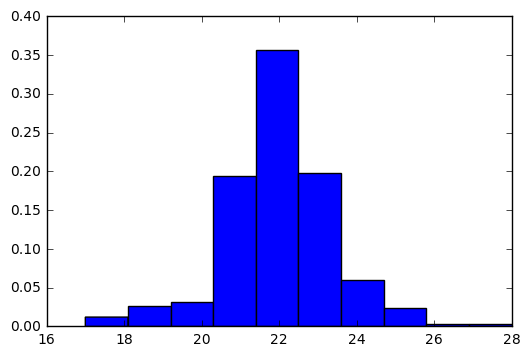

In [15]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = mirlen

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x,normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
#formatter = FuncFormatter(to_percent)

# Set the formatter
#plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [16]:
pd.Series(mirlen).value_counts()

22    53565
23    29792
21    29263
24     8983
20     4802
19     3989
25     3583
18     1250
17      565
28      418
26      387
dtype: int64

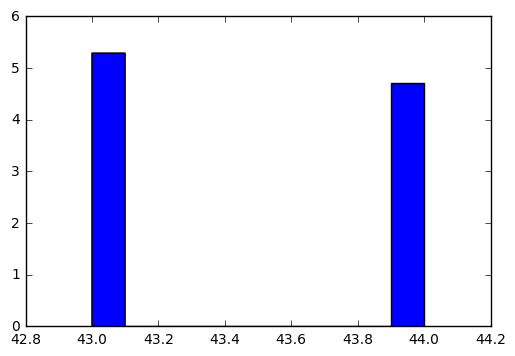

In [17]:
x = genelen
plt.hist(x,normed=True)
plt.show()

In [22]:
pd.Series(genelen).value_counts()

43    72284
44    64313
dtype: int64

In [23]:
pd.Series(mirlen).unique()

array([22, 21, 24, 28, 23, 20, 19, 17, 25, 18, 26])

In [24]:
len(targetscan.miRNA.unique())

470

In [25]:
len(targetscan.target.unique())

108248

In [26]:
len(targetscan.miRNA)

136597

In [27]:
len(targetscan.drop_duplicates())

136597

In [18]:
def parse_seq(a,maxlen):
    encode = {'A':[1,0.1,0.1,0.1],'C':[0.1,1,0.1,0.1],'G':[0.1,0.1,1,0.1],'T':[0.1,0.1,0.1,1],'U':[0.1,0.1,0.1,1],'N':[0,0,0,0]}
    out = np.zeros([maxlen,4])
    for idx, nt in enumerate(a):
        out[idx]=encode[nt]
    return out

def parse_seq1D(a,maxlen):
    encode = {'A':1,'C':2,'G':3,'T':4,'U':4,'N':0}
    out = np.zeros(maxlen)
    for idx, nt in enumerate(a):
        out[idx]=encode[nt]
    return out

In [19]:
maxlen=max(mirlen)

In [20]:
parse_seq(targetscan.miRNA[1],maxlen)

array([[1. , 0.1, 0.1, 0.1],
       [1. , 0.1, 0.1, 0.1],
       [0.1, 0.1, 1. , 0.1],
       [0.1, 0.1, 0.1, 1. ],
       [0.1, 0.1, 0.1, 1. ],
       [0.1, 0.1, 0.1, 1. ],
       [0.1, 0.1, 0.1, 1. ],
       [0.1, 0.1, 1. , 0.1],
       [0.1, 0.1, 0.1, 1. ],
       [1. , 0.1, 0.1, 0.1],
       [0.1, 1. , 0.1, 0.1],
       [0.1, 0.1, 0.1, 1. ],
       [0.1, 0.1, 0.1, 1. ],
       [1. , 0.1, 0.1, 0.1],
       [1. , 0.1, 0.1, 0.1],
       [0.1, 1. , 0.1, 0.1],
       [0.1, 0.1, 1. , 0.1],
       [1. , 0.1, 0.1, 0.1],
       [0.1, 1. , 0.1, 0.1],
       [0.1, 0.1, 1. , 0.1],
       [1. , 0.1, 0.1, 0.1],
       [0.1, 1. , 0.1, 0.1],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

In [21]:
targetscan["miRNA-1D"] = targetscan["miRNA"].apply(lambda x: parse_seq1D(x,maxlen))

In [22]:
maxglen = max(genelen)
targetscan["target-1D"] = targetscan["target"].apply(lambda x: parse_seq1D(x,maxglen))

In [23]:
targetscan

,miRNA,target,miRNA-1D,target-1D
0,GGGCUCCUCGGCCCGUCCGAA,CUCAUUCAGCAUGGGUCCUUGAUGCCAGAGGGCCAGCAGGCUC,"[3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, ...","[2.0, 4.0, 2.0, 1.0, 4.0, 4.0, 2.0, 1.0, 3.0, ..."
1,AAGUUUUGUACUUAACGACGAC,GGGGUAAAGUUAAGCUGCUAAAACCCCAUGUUGGCUGCUGCUGU,"[1.0, 1.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, ...","[3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 1.0, 3.0, ..."
2,UACGGGAAAGUAGUAACGUGAC,UGCAUGUUCUCUGUAAGCUUCAUCCAUGCUGGUUAUUGCACUGA,"[4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, ...","[4.0, 3.0, 2.0, 1.0, 4.0, 3.0, 4.0, 4.0, 2.0, ..."
3,GACGGACAGACACGGACGACA,CAGCUCCCCCAUGCGAGGAUCCGGGUCUGCCUCCUCCUGCUGA,"[3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 3.0, ...","[2.0, 1.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, ..."
4,CUCCACUGAGAUAGGAUACAGAAA,CUAAGCUUAAAAAAAACUCAUGGUGAGGCUUAACAAUGUCUUG,"[2.0, 4.0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 1.0, ...","[2.0, 4.0, 1.0, 1.0, 3.0, 2.0, 4.0, 4.0, 1.0, ..."
5,GGGCUCCUCGGCCCGUCCGAA,CCCAGCCAGGACAUGCUGGGUGCCCCAGCCUGCAGGCAGGCUUU,"[3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, ...","[2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, ..."
6,GCUUAGGUGGUGCUUGUUGAAG,AUUUAAGGAGUGUUUUGUAGGAUUCAACAACCACCACAACUUG,"[3.0, 2.0, 4.0, 4.0, 1.0, 3.0, 3.0, 4.0, 3.0, ...","[1.0, 4.0, 4.0, 4.0, 1.0, 1.0, 3.0, 3.0, 1.0, ..."
7,UUUGGAGAUUUUCCUACGUGAAA,AACUCUUGGUCAUUAUAGUAUAUGCCUAAAAUGUAUGCACUUA,"[4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.0, 4.0, ...","[1.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, ..."
8,UUCUCCAAAGGGCACAUACAAAGU,CUGAAACCAACUUGUCCCAGGCCACAGGAGUGUAUAUGUUUCAU,"[4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, ...","[2.0, 4.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, ..."
9,CCCCAUAAACUGUUUGACUGU,UCACUGGUGCCAGGAAGCCAAAGCUUACUUUGUAGAACUGACAC,"[2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, ...","[4.0, 2.0, 1.0, 2.0, 4.0, 3.0, 3.0, 4.0, 3.0, ..."


In [34]:
np.array(targetscan["target"].apply(lambda x: parse_seq1D(x,maxglen)))

array([ array([ 2.,  1.,  4.,  2.,  1.,  3.,  2.,  4.,  1.,  3.,  2.,  1.,  1.,
        1.,  1.,  3.,  1.,  1.,  3.,  4.,  1.,  1.,  2.,  1.,  1.,  3.,
        1.,  3.,  4.,  3.,  1.,  4.,  4.,  2.,  4.,  4.,  3.,  2.,  4.,
        3.,  2.,  4.,  1.,  4.]),
       array([ 2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  1.,  4.,  4.,
        4.,  4.,  3.,  1.,  4.,  3.,  4.,  4.,  1.,  1.,  3.,  3.,  4.,
        3.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  2.,  1.,  4.,  1.,  4.,
        3.,  2.,  1.,  4.,  0.]),
       array([ 1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  3.,  1.,  3.,  1.,  2.,
        4.,  3.,  3.,  1.,  1.,  3.,  3.,  4.,  4.,  2.,  1.,  1.,  1.,
        2.,  2.,  3.,  3.,  1.,  1.,  1.,  3.,  2.,  1.,  3.,  4.,  4.,
        2.,  4.,  2.,  2.,  0.]),
       ...,
       array([ 1.,  1.,  1.,  1.,  1.,  4.,  4.,  4.,  1.,  1.,  1.,  3.,  3.,
        3.,  4.,  3.,  4.,  1.,  2.,  4.,  4.,  1.,  4.,  1.,  4.,  2.,
        2.,  1.,  2.,  1.,  2.,  4.,  3.,  2.,  1.,  2.,  1.,  2.